# 1. Importação de bibliotecas

In [8]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import colors

from sklearn.cluster import DBSCAN, KMeans

import seaborn as sns
sns.set()

from PIL import Image

import numpy as np
from numpy import mean
from numpy import isnan
from numpy import asarray

import os
import shutil, glob, os.path

from random import shuffle

from tqdm import tqdm

import math

import skimage
from skimage import data, io, color
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu 
from skimage.feature import canny 

from time import time

from random import randint

from scipy import stats


# 2. PREPROCESSAMENTO DAS IMAGENS, transformando em escala de cinza utilizando a função rgb2gray

Using Gray Scale Segmentation .............
files in directory:  ./faces 
 ['branca01.jpg', 'branca02.jpg', 'branca03.jpg', 'casal_branco01.jpg', 'casal_moreno01.jpg', 'familia_branca01.jpg', 'familia_morena01.jpg', 'homem_branco01.jpg', 'homem_branco02.jpg', 'homem_branco03.jpg', 'homem_branco04.jpg', 'homem_moreno01.jpg', 'homem_moreno02.jpg', 'homem_moreno03.jpg', 'homem_moreno04.jpg', 'image_teste_segementacao_3_classes.png', 'jovem_branco01.jpg', 'jovem_branco02.jpg', 'jovem_branco03.jpg', 'jovem_branco04.jpg', 'jovem_loura01.jpg', 'jovem_moreno01.jpg', 'jovem_moreno02.jpg', 'jovem_moreno03.jpg', 'jovem_moreno04.jpg', 'morena01.jpg', 'morena02.jpg', 'morena03.jpg', 'mulher_morena01.jpg', 'mulher_morena02.jpg', 'mulher_morena03.jpg', 'senhora_branca01.jpg', 'senhora_branca02.jpg', 'senhora_branca03.jpg', 'senhora_branca04.jpg', 'senhora_morena01.jpg', 'senhora_morena02.jpg', 'senhora_morena03.jpg', 'senhora_morena04.jpg', 'senhor_branco01.jpg', 'senhor_branco02.jpg', 'senhor_branco

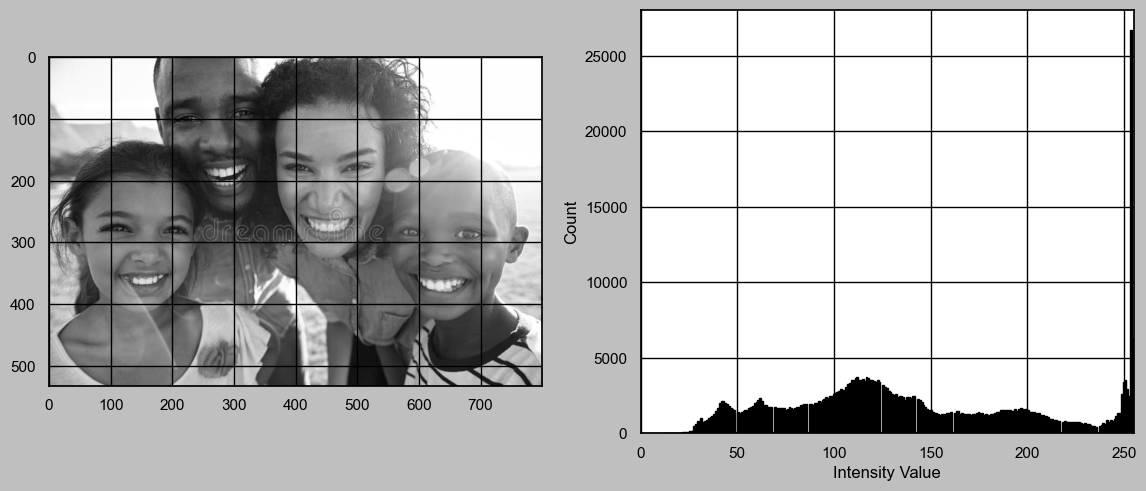


Imagem # 2 : homem_branco01.jpg
resolução da imagem:  (532, 426, 3)


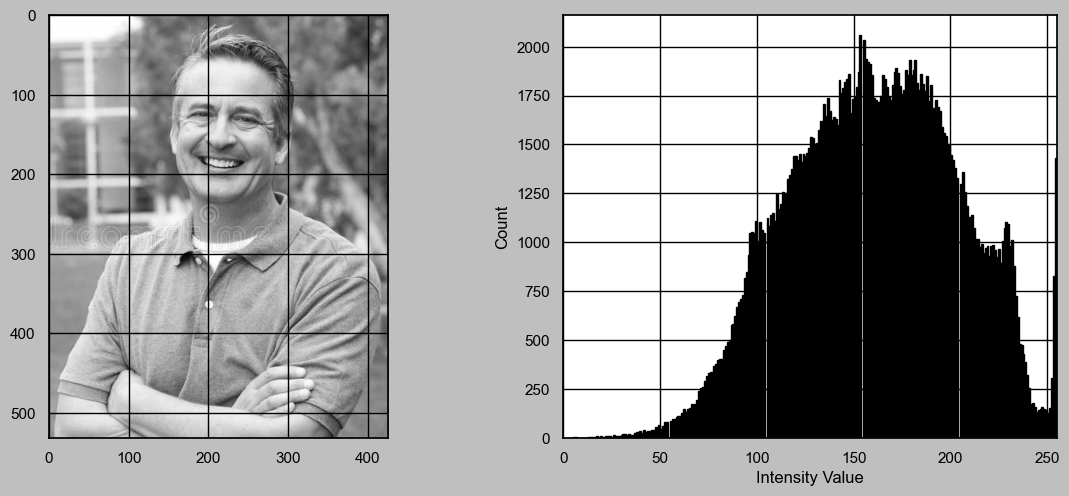


Imagem # 3 : homem_branco02.jpg
resolução da imagem:  (504, 652, 3)


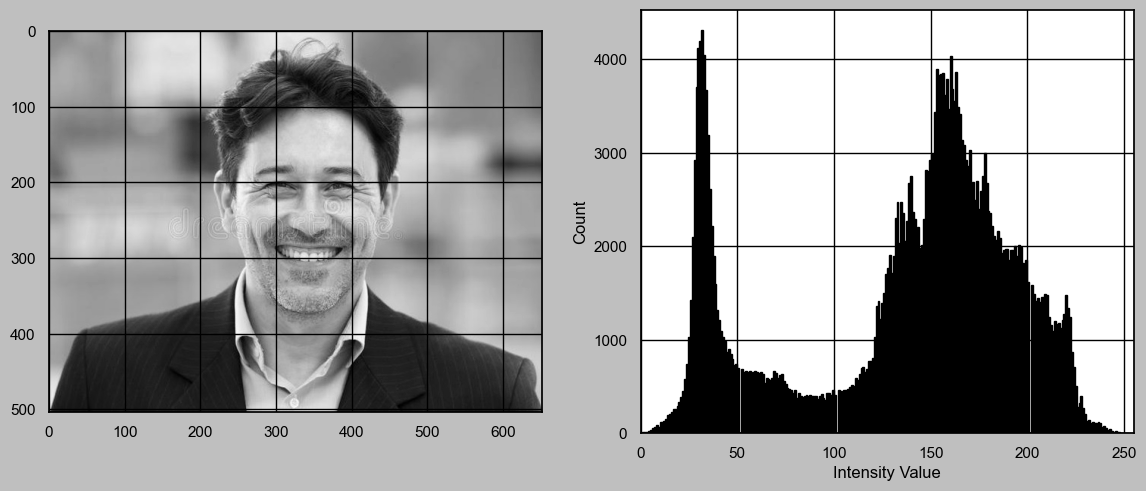


Imagem # 4 : homem_branco03.jpg
resolução da imagem:  (525, 602, 3)


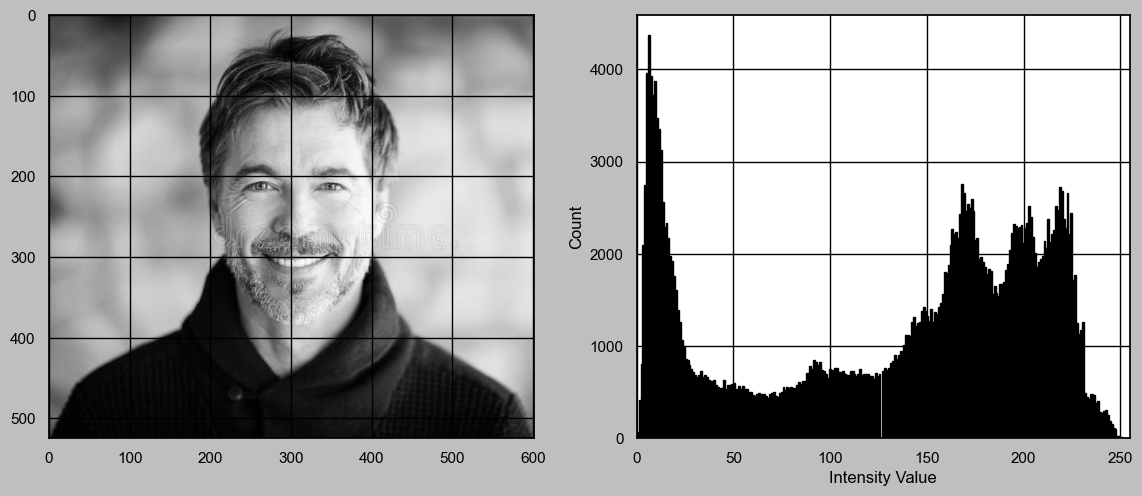


Imagem # 5 : homem_branco04.jpg
resolução da imagem:  (558, 404, 3)


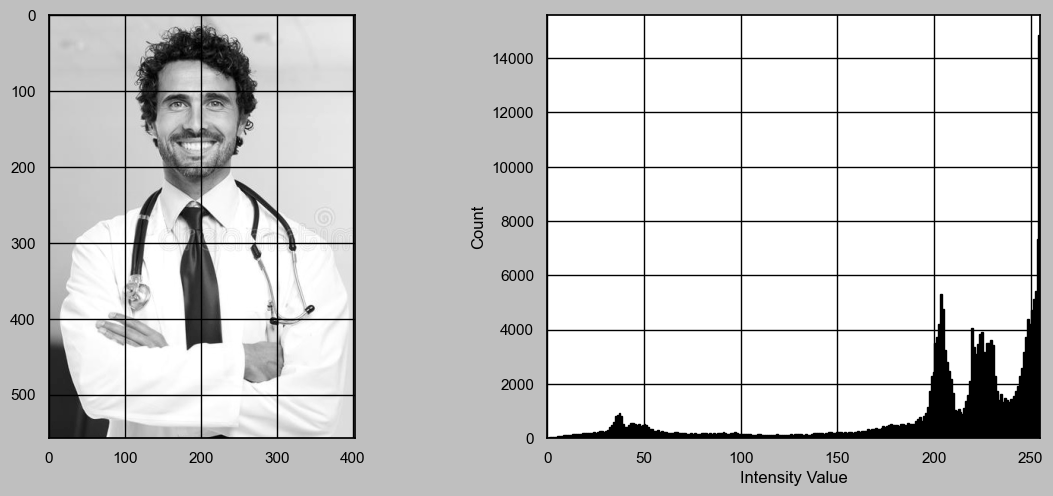


Imagem # 6 : homem_moreno01.jpg
resolução da imagem:  (534, 585, 3)


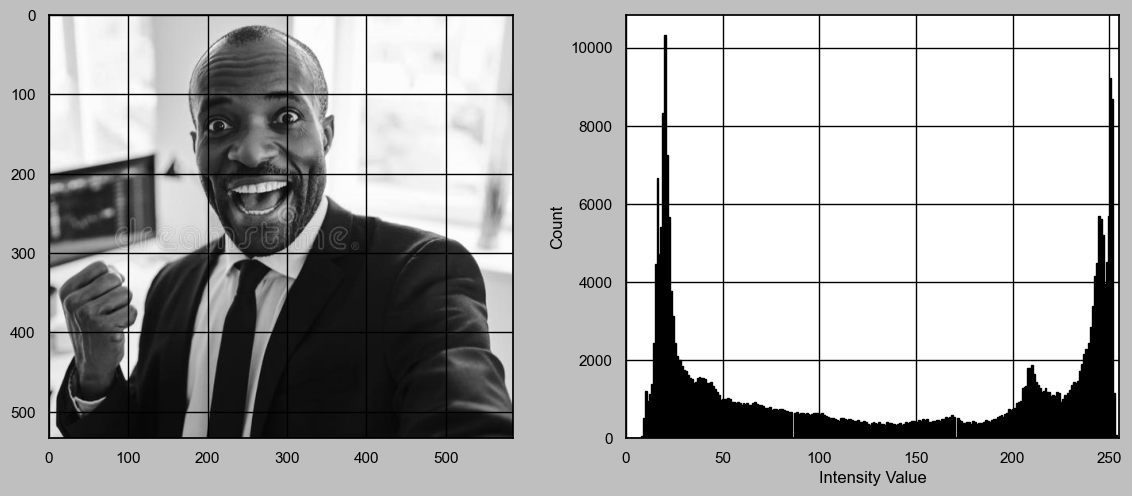

In [9]:
as_gray = True #True  #False #True para trabalhar com imagens em escala de cinza

if as_gray:
    print("Using Gray Scale Segmentation .............")

#contagem e verificação das imagens
    
INPUT_PATH = './faces'
#INPUT_PATH = 'D:\\Users\\diego\\Google Drive\\AUNEB\\ADocencia\\EP\\datasets\\faces'


Files=os.listdir(INPUT_PATH)
print("files in directory: ",INPUT_PATH,"\n",os.listdir(INPUT_PATH))

Img=[]
img=[]
ncolors=[]
ResX=[]
ResY=[]
n=[]

nImg = 6
ini_img = 6
fim_img = 12
print("\nSelecionadas as imgs de", ini_img, "até", fim_img)
ctr = 1
for filename in Files[ini_img:fim_img]:
    
    if filename.endswith('.jpg') or filename.endswith('.png') or filename.endswith('.jpeg'): # filtro formato da imagem
        try:
            img.append(io.imread(INPUT_PATH+"/"+filename))#, as_gray=as_gray)) # open the image file
            print("\nImagem #",ctr,':',filename)
            ctr+=1
            print("resolução da imagem: ",img[-1].shape)
            Img.append(img) # backup of original images
            
            ncolors.append(img[-1].shape[-1])
            ResX.append(img[-1].shape[0])
            ResY.append(img[-1].shape[1])
            n.append(ResX[-1]*ResY[-1])
            if not as_gray: 
                fig2, ax2 = plt.subplots(1,3, figsize=(20, 5.5))
                ax2[0].imshow(img[-1])
                if ncolors[-1]>1:
                    ax2[1].hist(img[-1].ravel(), bins = 64, color = 'orange', alpha = 0.5)
                    ax2[1].legend(['Total'])
                    ax2[2].hist(img[-1][:, :, 0].ravel(), bins = 64, color = 'Red', alpha = 0.5)
                    ax2[2].hist(img[-1][:, :, 1].ravel(), bins = 64, color = 'Green', alpha = 0.5)
                    ax2[2].hist(img[-1][:, :, 2].ravel(), bins = 64, color = 'Blue', alpha = 0.5)
                    ax2[2].legend(['Red_Channel', 'Green_Channel', 'Blue_Channel'])
                    ax2[1].set_xlim(0, 255)
                    ax2[1].set_xlabel('Intensity Value')
                    ax2[1].set_ylabel('Count')
                    ax2[2].set_xlim(0, 255)
                    ax2[2].set_xlabel('Intensity Value')
                    ax2[2].set_ylabel('Count')
                plt.show()
            else: # to work with gray images
                plt.style.use('grayscale')
                if ncolors[-1]>1: # if it is RGB convert to grayscale
                    img[-1]=np.round(255*rgb2gray(img[-1]))
                ncolors[-1]=1
                fig2, ax2 = plt.subplots(1,2, figsize=(14, 5.5))
                ax2[0].imshow(img[-1])
                ax2[1].hist(img[-1].ravel(), bins = 256)   
                ax2[1].set_xlim(0, 255)
                ax2[1].set_xlabel('Intensity Value')
                ax2[1].set_ylabel('Count')
                plt.show()
        except (IOError, SyntaxError) as e:
            print('Bad file:', filename)


# 3. Transformando imagens em vetores e geração de cores para representar cada cluster

In [10]:


Images=[]

for my_img in range(nImg):

    image=img[my_img]

    ch=[] # color channel vectors 

    for c in range(ncolors[my_img]):
        if ncolors[my_img]>1:
            ch.append(image[:,:,c].flatten()) 
        else:
            ch.append(image.flatten())
    print(ch)
    Images.append(np.array(ch))

[array([220., 220., 220., ..., 171., 178., 182.])]
[array([255., 255., 255., ..., 136., 138., 138.])]
[array([142., 142., 141., ...,  81.,  85., 110.])]
[array([ 67.,  67.,  68., ...,  79.,  89., 100.])]
[array([204., 204., 204., ..., 219., 219., 219.])]
[array([253., 253., 252., ...,  41.,  40.,  38.])]


In [11]:
my_color = []
my_color.append('#%06X' % 0)
my_color.append('#%06X' % 0xFFFFFF)
for i in range(20):
    my_color.append('#%06X' % randint(0, 0xFFFFFF))

# 4. Função K-means e classe para guardar os dados de execução de cada imagem para cada K (2,3,4) clusters

In [12]:
#K-means

def kmeans(image, K, ncolors, n, maxiter):
    tempo_inicio = time()

    cc = np.zeros((ncolors,K), dtype=int) # vetor (matriz) de centroides

    classe = [-1 for i in range(n)] # inicializa o vetor de classificação de cada n da img. Todos com -1 inicialmente

    # DIEGO
    # inicialização não-randomica dos centroides
    if ncolors > 1:
        cluster_size = []
        for c in range(ncolors):
            cluster_size.append(int((np.max(image[c])-np.min(image[c]))/K))
            cc[c,0] = int(cluster_size[-1]/2)
            for k in range(1,K):
                cc[c,k] = cc[c,k-1] + cluster_size[-1]
    else:    
        cluster_size = int((np.max(image)-np.min(image))/K)
        cc[0,0] = int(cluster_size/2)
        for k in range(1,K):
            cc[0,k] = cc[0,k-1] + cluster_size

#     min_cinza = min(np.array(image).ravel())
#     max_cinza = max(np.array(image).ravel())
#     S = (max_cinza - min_cinza) / K
#     bg = [0]*K
#     ed = [0]*K
#     for k in range(K):
#         if k == 0:
#             bg[k] = min_cinza
#             ed[k] = min_cinza + S
#         else:
#             bg[k] = ed[k-1] + 1
#             ed[k] = ed[k-1] + S
#         for c in range(ncolors):
#             cc[c,k] = int( (ed[k] + bg[k]) / 2 )

    INIT_TIME = time() - tempo_inicio

    tempo_inicio = time()

    #Processo iterativo
    iteracoes = 0                                                    
    while True:                                                      
        iteracoes += 1

        if iteracoes > maxiter:
            print("O número máximo de iterações (", maxiter,") foi excedido!")
            break

        mudanca = 0                                                     #foca = [0 , 0, 0, 1]

        for i in range(n):    # varrendo os pixels                      #foca = [0, n, n, n + 2]
            d_minima = 1e30                                             #foca = n * [0 , 0, 0, 1]
            k_mais_prox = -1                                            #foca = n * [0, 0, 0, 1]

            for k in range(K):   # varrendo clusters                    #foca = n * [0, k, k, k + 2]
                d = 0                                                   #foca = k * n * [0, 0, 0, 1]

                for c in range(ncolors):                                #foca = k * n * [0, c, c, c + 2]
                    dist = image[c][i] - cc[c][k]                       #foca = c * k * n * [0, 1, 0, 3] ???
                    if dist < 0:                                        #foca = c * k * n * [0, 0, 1, 0]
                        dist = dist * -1                                #foca = c * k * n * [0, 1, 0, 1]
                    d += dist                                           #foca = c * k * n * [0, 1, 0, 1]

                if d < d_minima:                                        #foca = k * n * [0, 0, 1, 0]
                    d_minima = d                                        #foca = k * n * [0, 0, 0, 1]
                    k_mais_prox = k                                     #foca = k * n * [0, 0, 0, 1]

            if classe[i] != k_mais_prox:                                #foca = n * [0, 0, 1, 1] ???
                # define a qual cluster aquele pixel pertence
                classe[i] = k_mais_prox                                 #foca = n * [0, 0, 0, 2] ???
                mudanca += 1                                            #foca = n * [0, 1, 0, 1]
        #DIEGO
        #print("ITERAÇÃO: ",iteracoes," MUDANÇAS:",mudanca)
        
        if mudanca == 0:                                                #foca = [0, 0, 1, 0]
            ITER_TIME = (time() - tempo_inicio)/iteracoes #DIEGO
            #print("TERMINEI - TEMPO MÉDIO POR ITERAÇÃO: ",ITER_TIME)
            break
        else:   # calculando novos centroides
            cluster_sz = [0 for k in range(K)]                          #foca = [0, k, k, 2k + 2]
            for i in range(n):                                          #foca = [0, n, n, n + 2]
                for c in range(ncolors):                                #foca = n * [0, c, c, c + 2]
                    cc[c][classe[i]] += image[c][i]                     #foca = c * n * [0, 1, 0, 4] ???
                    cluster_sz[classe[i]] += 1                          #foca = c * n * [0, 1, 0, 3] ???

            for k in range(K):                                          #foca = [0, k, k, k + 2]
                if cluster_sz[k]>0:                                     #foca = k * [0, 0, 1, 1] ???
                    for c in range(ncolors):                            #foca = k * [0, c, c, c + 2]
                        cc[c][k] = int(cc[c][k]/cluster_sz[k])          #foca = c * k * [0, 1, 0, 3] ???? int()
                else: # caso um cluster fique sem nenhum ponto
                    print("Cluster", k,"sem pontos... Reinicializando o algortimo")
                    iteracoes = 0
                    for k in range(K):
                        p = randint(0,n-1) # pega um ponto qualquer
                        for c in range(ncolors):
                            cc[c,k] = image[c,p]

    return ITER_TIME, iteracoes, classe, cc

In [13]:
class Image_per_cluster:
    def __init__(self, n, k, t, var, iterations):
        self.n = n
        self.k = k
        self.t = t
        self.var = var
        self.iterations = iterations

    def __repr__(self):
        return str(self)

# 5. Experimentos: 10 repetições para cada imagem para cada K (2,3,4) clusters, guardando os dados e plotando os resultados de máscara



IMAGEM NÚMERO 1 :


Número de clusters: 2 
Tamanho da imagem: 426400 
Tempo médio por iteração (std): 1.09034423828125 ( 0.014443904664652328 )
Variabilidade: 0.013247105049521599 
Iterações (std): 8.0 ( 0.0 )
Cluster 0 limites 12.0 : 156.0
Cluster 1 limites 157.0 : 255.0


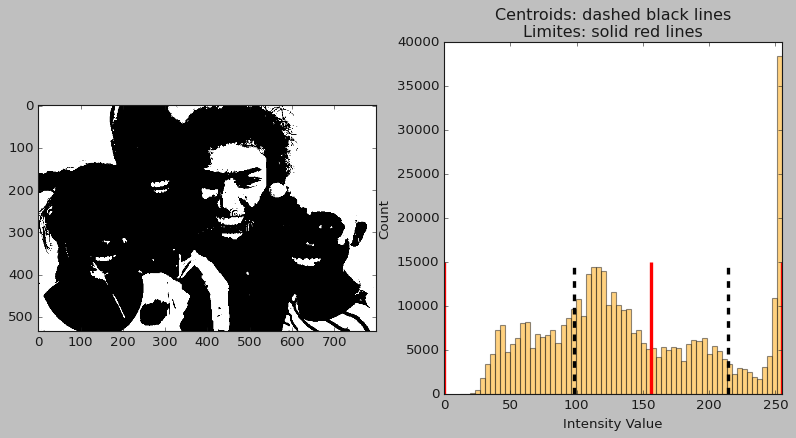

Número de clusters: 3 
Tamanho da imagem: 426400 
Tempo médio por iteração (std): 1.5009583340750798 ( 0.011424248066975458 )
Variabilidade: 0.007611302597560315 
Iterações (std): 9.0 ( 0.0 )
Cluster 0 limites 12.0 : 97.0
Cluster 1 limites 98.0 : 176.0
Cluster 2 limites 177.0 : 255.0


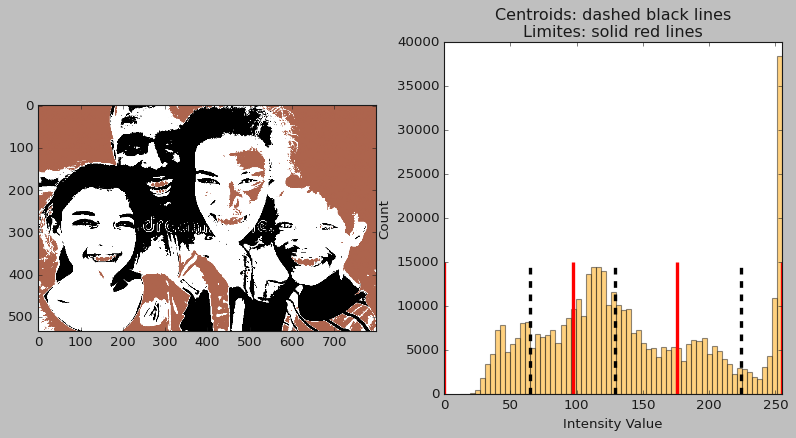

Número de clusters: 4 
Tamanho da imagem: 426400 
Tempo médio por iteração (std): 1.9546266039212543 ( 0.02328735214470187 )
Variabilidade: 0.011913964589443419 
Iterações (std): 18.0 ( 0.0 )
Cluster 0 limites 12.0 : 88.0
Cluster 1 limites 89.0 : 148.0
Cluster 2 limites 149.0 : 212.0
Cluster 3 limites 213.0 : 255.0


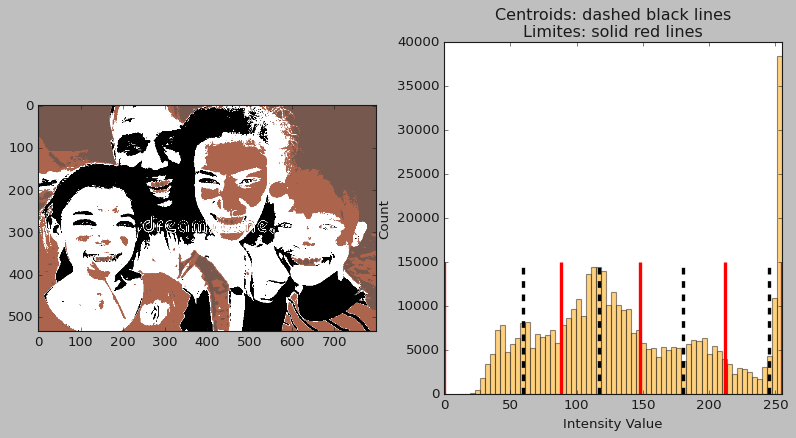



IMAGEM NÚMERO 2 :


Número de clusters: 2 
Tamanho da imagem: 226632 
Tempo médio por iteração (std): 0.5754421869913737 ( 0.003704486458915698 )
Variabilidade: 0.006437634470778262 
Iterações (std): 9.0 ( 0.0 )
Cluster 0 limites 4.0 : 158.0
Cluster 1 limites 159.0 : 255.0


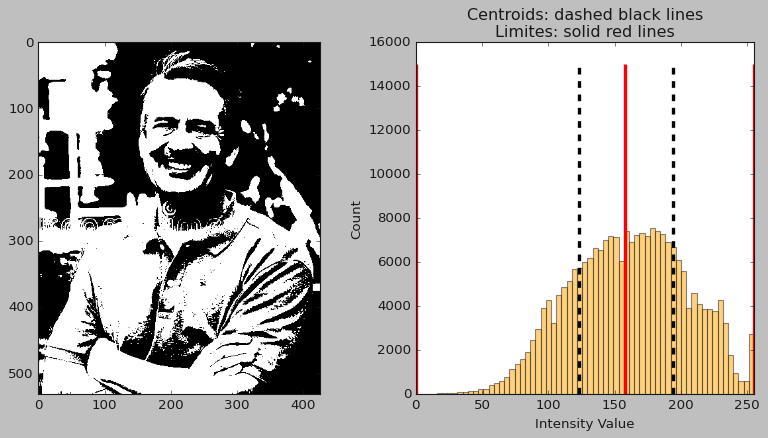

Número de clusters: 3 
Tamanho da imagem: 226632 
Tempo médio por iteração (std): 0.7993678617477417 ( 0.009182095441391555 )
Variabilidade: 0.011486695776479903 
Iterações (std): 15.0 ( 0.0 )
Cluster 0 limites 4.0 : 131.0
Cluster 1 limites 132.0 : 182.0
Cluster 2 limites 183.0 : 255.0


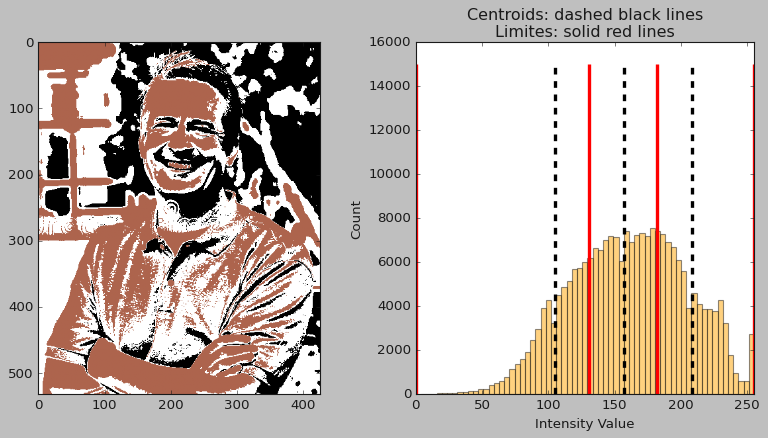

Número de clusters: 4 
Tamanho da imagem: 226632 
Tempo médio por iteração (std): 1.0213454935285782 ( 0.00490774029701916 )
Variabilidade: 0.0048051715390291065 
Iterações (std): 18.0 ( 0.0 )
Cluster 0 limites 4.0 : 113.0
Cluster 1 limites 114.0 : 153.0
Cluster 2 limites 154.0 : 194.0
Cluster 3 limites 195.0 : 255.0


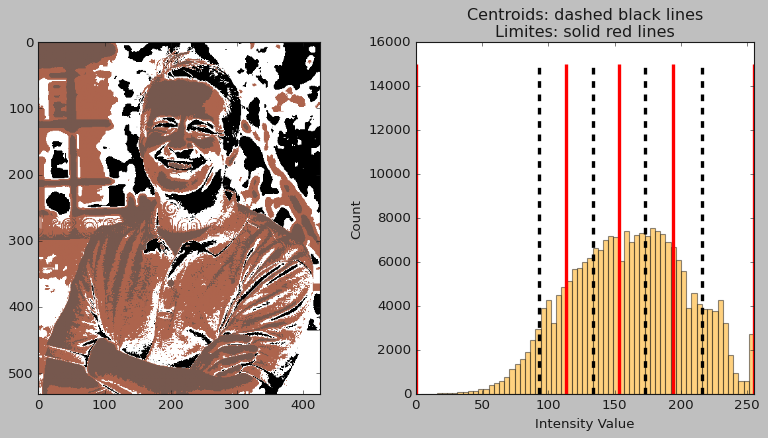



IMAGEM NÚMERO 3 :


Número de clusters: 2 
Tamanho da imagem: 328608 
Tempo médio por iteração (std): 0.841385511557261 ( 0.002665376149014775 )
Variabilidade: 0.0031678417472171803 
Iterações (std): 6.0 ( 0.0 )
Cluster 0 limites 1.0 : 106.0
Cluster 1 limites 107.0 : 252.0


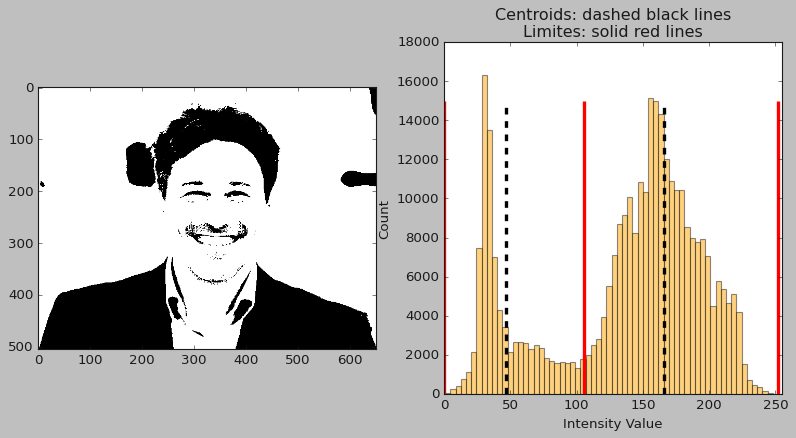

Número de clusters: 3 
Tamanho da imagem: 328608 
Tempo médio por iteração (std): 1.143774838447571 ( 0.0057827178069301 )
Variabilidade: 0.005055818341640474 
Iterações (std): 5.0 ( 0.0 )
Cluster 0 limites 1.0 : 93.0
Cluster 1 limites 94.0 : 167.0
Cluster 2 limites 168.0 : 252.0


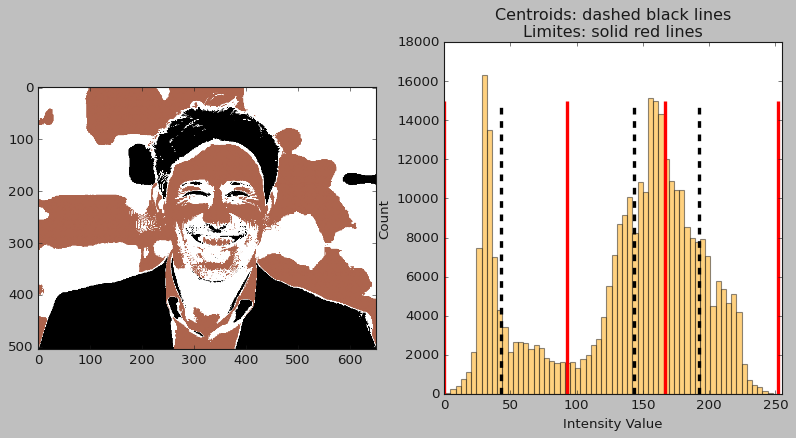

Número de clusters: 4 
Tamanho da imagem: 328608 
Tempo médio por iteração (std): 1.4963900668280465 ( 0.012587095997245983 )
Variabilidade: 0.008411640972682556 
Iterações (std): 14.0 ( 0.0 )
Cluster 0 limites 1.0 : 79.0
Cluster 1 limites 80.0 : 138.0
Cluster 2 limites 139.0 : 178.0
Cluster 3 limites 179.0 : 252.0


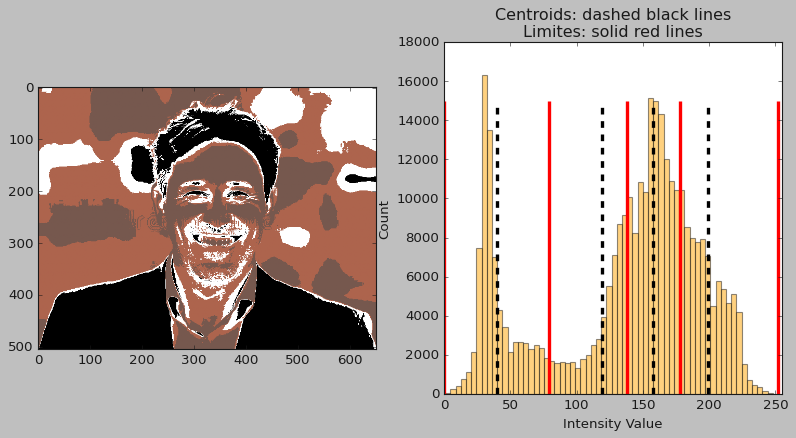



IMAGEM NÚMERO 4 :


Número de clusters: 2 
Tamanho da imagem: 316050 
Tempo médio por iteração (std): 0.7989959597587586 ( 0.00615102455095178 )
Variabilidade: 0.007698442621423221 
Iterações (std): 6.0 ( 0.0 )
Cluster 0 limites 0.0 : 110.0
Cluster 1 limites 111.0 : 254.0


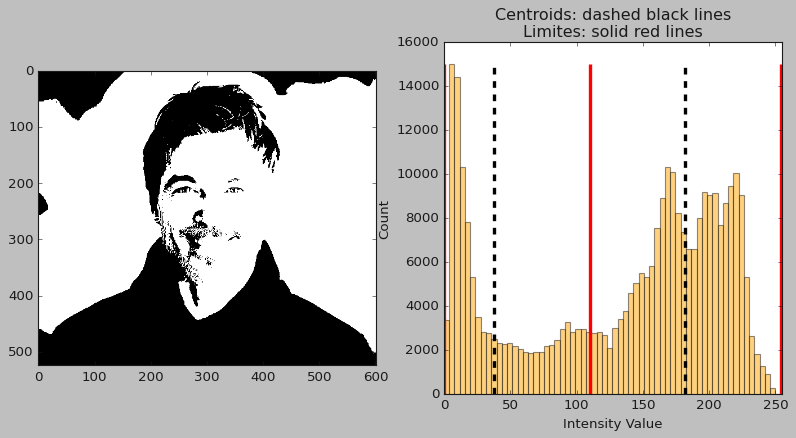

Número de clusters: 3 
Tamanho da imagem: 316050 
Tempo médio por iteração (std): 1.1059152709113227 ( 0.006335146300541164 )
Variabilidade: 0.0057284192262945476 
Iterações (std): 9.0 ( 0.0 )
Cluster 0 limites 0.0 : 75.0
Cluster 1 limites 76.0 : 163.0
Cluster 2 limites 164.0 : 254.0


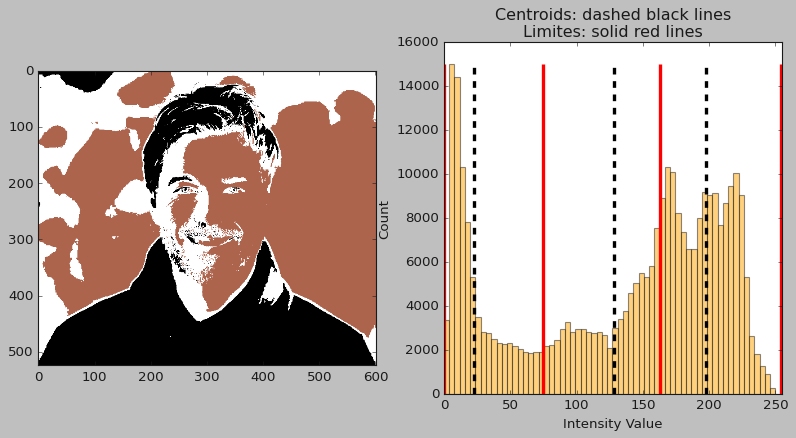

Número de clusters: 4 
Tamanho da imagem: 316050 
Tempo médio por iteração (std): 1.411778497695923 ( 0.010788117939173957 )
Variabilidade: 0.007641508888809812 
Iterações (std): 4.0 ( 0.0 )
Cluster 0 limites 0.0 : 57.0
Cluster 1 limites 58.0 : 129.0
Cluster 2 limites 130.0 : 186.0
Cluster 3 limites 187.0 : 254.0


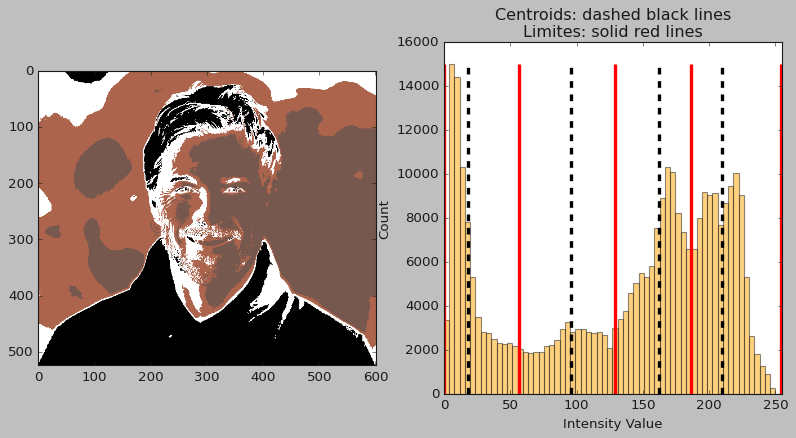



IMAGEM NÚMERO 5 :


Número de clusters: 2 
Tamanho da imagem: 225432 
Tempo médio por iteração (std): 0.5713890027999877 ( 0.004252155524792607 )
Variabilidade: 0.007441787475705155 
Iterações (std): 5.0 ( 0.0 )
Cluster 0 limites 0.0 : 143.0
Cluster 1 limites 144.0 : 255.0


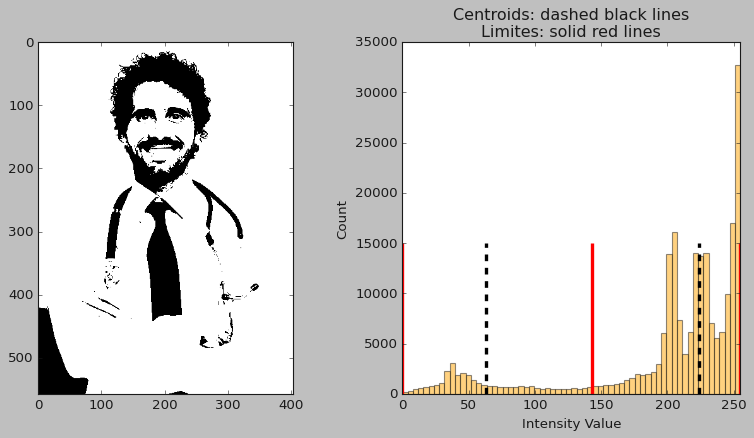

Número de clusters: 3 
Tamanho da imagem: 225432 
Tempo médio por iteração (std): 0.8045050929574404 ( 0.003426432225587667 )
Variabilidade: 0.0042590559781191225 
Iterações (std): 17.0 ( 0.0 )
Cluster 0 limites 0.0 : 125.0
Cluster 1 limites 126.0 : 216.0
Cluster 2 limites 217.0 : 255.0


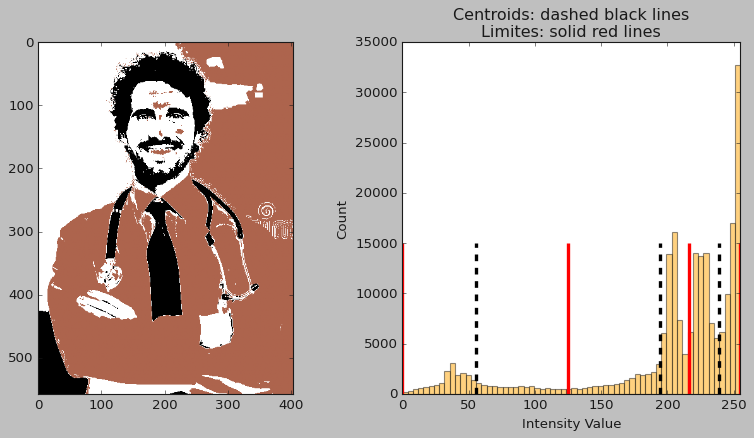

Número de clusters: 4 
Tamanho da imagem: 225432 
Tempo médio por iteração (std): 1.0200881737929124 ( 0.00335917407107109 )
Variabilidade: 0.0032930232477658685 
Iterações (std): 13.0 ( 0.0 )
Cluster 0 limites 0.0 : 83.0
Cluster 1 limites 84.0 : 162.0
Cluster 2 limites 163.0 : 220.0
Cluster 3 limites 221.0 : 255.0


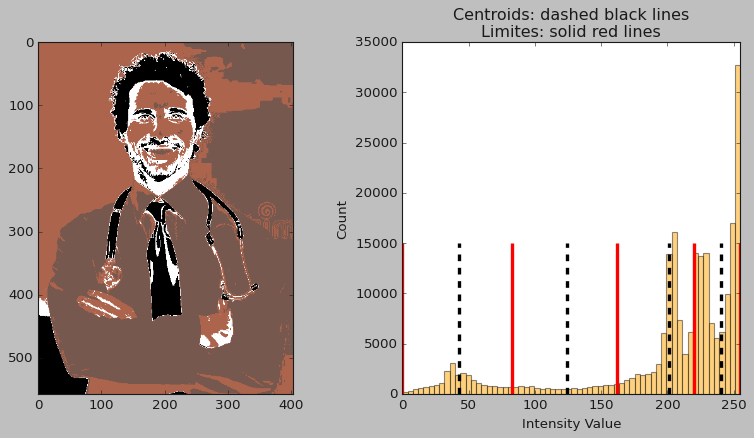



IMAGEM NÚMERO 6 :


Número de clusters: 2 
Tamanho da imagem: 312390 
Tempo médio por iteração (std): 0.7763436746597291 ( 0.00228504060389891 )
Variabilidade: 0.002943336409484423 
Iterações (std): 5.0 ( 0.0 )
Cluster 0 limites 2.0 : 133.0
Cluster 1 limites 134.0 : 255.0


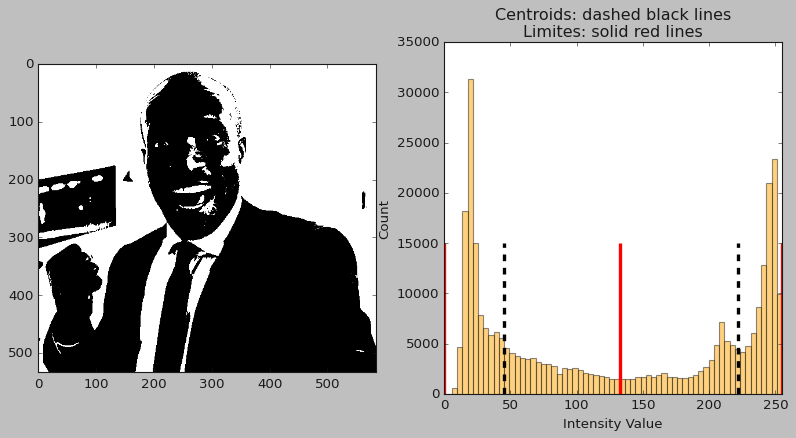

Número de clusters: 3 
Tamanho da imagem: 312390 
Tempo médio por iteração (std): 1.0771724939346314 ( 0.005671560566004348 )
Variabilidade: 0.0052652296618600145 
Iterações (std): 4.0 ( 0.0 )
Cluster 0 limites 2.0 : 77.0
Cluster 1 limites 78.0 : 177.0
Cluster 2 limites 178.0 : 255.0


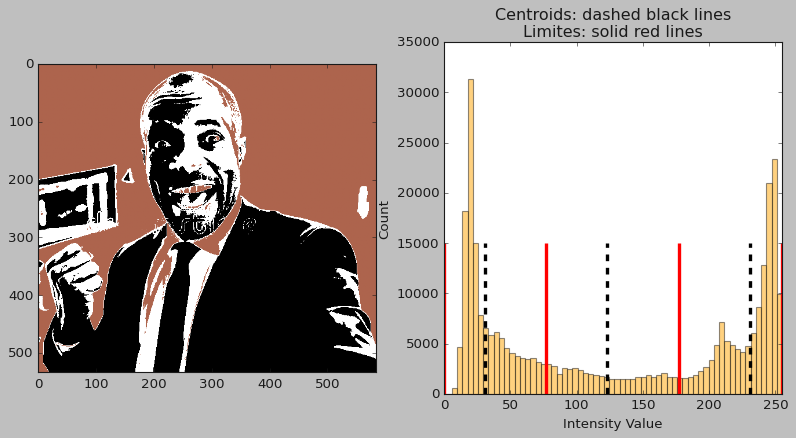

Número de clusters: 4 
Tamanho da imagem: 312390 
Tempo médio por iteração (std): 1.4062304337819418 ( 0.006718063785885853 )
Variabilidade: 0.0047773562742616585 
Iterações (std): 6.0 ( 0.0 )
Cluster 0 limites 2.0 : 55.0
Cluster 1 limites 56.0 : 124.0
Cluster 2 limites 125.0 : 199.0
Cluster 3 limites 200.0 : 255.0


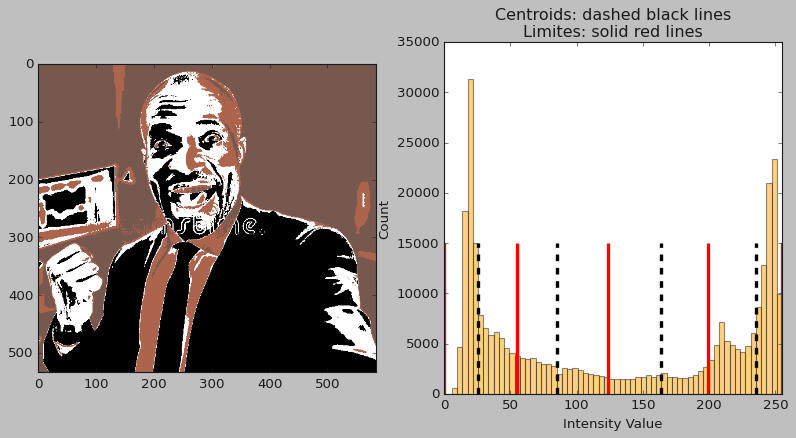

In [14]:
# Experimentos

plt.style.use('classic')

RODADAS_BENCHMARK = 10
MIN_CLUSTERS = 2
MAX_CLUSTERS = 4

L = 256

lista_full = [] # Guarda o array de cada imagem (stats_per_image)

for i in range(nImg):

    stats_per_image = [] # Guarda três instâncias da classe Image_per_cluster()

    print("\n\nIMAGEM NÚMERO", i+1,":\n\n")

    #print("n     K     itTime (Std)     Variabilidade     Iterations (Std)")
    x = ResX[i]
    y = ResY[i]
    N = x*y

    for K in range(MIN_CLUSTERS, MAX_CLUSTERS + 1):

        ItTime=[]
        Iter=[]

        for bench in range(RODADAS_BENCHMARK):
            IterTime, iterations, classe, centros = kmeans(Images[i], K, ncolors[i], N, 100)

            ItTime.append(IterTime)
            Iter.append(iterations)
        
        
        if np.std(Iter)>0:
            print("INSTABILIDADE NO CÓDIGO -  NUMERO DE ITERAÇÕES DIFERENTES NAS REPETIÇÕES COM K=",K)
        
        image_pk = Image_per_cluster(N, K, np.mean(ItTime), np.std(ItTime)/np.mean(ItTime), np.mean(Iter))
        
        print("Número de clusters:", K,"\nTamanho da imagem:",N, "\nTempo médio por iteração (std):", image_pk.t, '(', np.std(ItTime), ')\nVariabilidade:', image_pk.var, "\nIterações (std):", image_pk.iterations, '(', np.std(Iter), ')')

        
        stats_per_image.append(image_pk)

        # ordenando centroides das classes de menor para maior
        OrderOf = np.argsort(centros)[0]

        # calculando os limites das classes
        up = []
        dw = []
        for k in range(K):
            clsslst = np.argwhere(np.array(classe) == k)
            clsspxls = Images[i][0][clsslst]
            up.append(np.max(clsspxls))
            dw.append(np.min(clsspxls))
            print("Cluster", k, "limites", dw[-1], ":", up[-1])

        # gerando a mascara com K cores segundo a classificação dos pixels
        Mask = []
        for j in range(N):
            Mask.append(colors.hex2color(my_color[OrderOf[classe[j]]]))

        # PLOT

        fig, ax = plt.subplots(1,2, figsize=(12, 5.5))
        ax[0].imshow(np.array(Mask).reshape(x,y,-1))
        ax[1].hist(np.array(Images[i]).ravel(), bins = 64, color = 'orange', alpha = 0.5)
        ax[1].set_xlim(0, L-1)
        if ncolors[i]>1:
            C = []
            for k in range(K):
                C.append(int(0.2989*centros[0][k]+0.5870*centros[1][k]+0.1140*centros[2][k]))
        else:
            C = centros
        ax[1].vlines(C,0,15000,linestyles='dashed',linewidths=3,colors='black') # centroides
        ax[1].vlines([0]+up,0,15000,linestyles='solid',linewidths=3,colors='red') # limites
        ax[1].set_xlabel('Intensity Value')
        ax[1].set_ylabel('Count')
        ax[1].set_title('Centroids: dashed black lines\nLimites: solid red lines')

        plt.show()

    lista_full.append(stats_per_image)
    

# 6. Funções para plotar a regressão linear de acordo com o objetivo

In [24]:
# Calcular a regressão linear
def show_linear_time(n,t):
    slope, intercept, r_value, p_value, std_err = stats.linregress(n, t)
    line = slope * np.array(n) + intercept
    
    # Calcular R^2 (coeficiente de determinação) e o coeficiente de correlação de Pearson
    r_squared = r_value ** 2
    pearson_coeficiente = r_value
    
    # Plotar os pontos e a linha de regressão linear
    plt.scatter(n, t, label='Pontos')
    plt.plot(n, line, color='red', label='Regressão Linear')
    
    # Adicionar título com R^2 e o coeficiente de correlação de Pearson
    titulo = f'Regressão Linear (R²={r_squared:.2f}, Pearson={pearson_coeficiente:.2f})'
    plt.title(titulo)
    # Adicionar legenda para a equação da linha
    plt.text(0.07, 0.8, f'time = {slope:.2g}n + {intercept:.2g}', fontsize=12, transform=plt.gca().transAxes)
    
    # Adicionar legendas
    plt.xlabel('problem size (n)')
    plt.ylabel('time')
    plt.legend(loc="lower right")
    
    # Exibir o gráfico
    plt.show()
    
    return slope

def show_linear_iter(n,t):
    slope, intercept, r_value, p_value, std_err = stats.linregress(n, t)
    line = slope * np.array(n) + intercept
    
    # Calcular R^2 (coeficiente de determinação) e o coeficiente de correlação de Pearson
    r_squared = r_value ** 2
    pearson_coeficiente = r_value
    
    # Plotar os pontos e a linha de regressão linear
    plt.scatter(n, t, label='Pontos')
    plt.plot(n, line, color='red', label='Regressão Linear')
    
    # Adicionar título com R^2 e o coeficiente de correlação de Pearson
    titulo = f'Regressão Linear (R²={r_squared:.2f}, Pearson={pearson_coeficiente:.2f})'
    plt.title(titulo)
    # Adicionar legenda para a equação da linha
    plt.text(0.07, 0.8, f'iterations = {slope:.2g}n + {intercept:.2g}', fontsize=12, transform=plt.gca().transAxes)
    
    # Adicionar legendas
    plt.xlabel('number of clusters (K)')
    plt.ylabel('iterations')
    plt.legend(loc="upper left")
    
    # Exibir o gráfico
    plt.show()
    
def show_linear_K(n,t):
    slope, intercept, r_value, p_value, std_err = stats.linregress(n, t)
    line = slope * np.array(n) + intercept
    
    # Calcular R^2 (coeficiente de determinação) e o coeficiente de correlação de Pearson
    r_squared = r_value ** 2
    pearson_coeficiente = r_value
    
    # Plotar os pontos e a linha de regressão linear
    plt.scatter(n, t, label='Pontos')
    plt.plot(n, line, color='red', label='Regressão Linear')
    
    # Adicionar título com R^2 e o coeficiente de correlação de Pearson
    titulo = f'Regressão Linear (R²={r_squared:.2f}, Pearson={pearson_coeficiente:.2f})'
    plt.title(titulo)
    # Adicionar legenda para a equação da linha
    plt.text(0.07, 0.8, f'slopes = {slope:.2g}K + {intercept:.2g}', fontsize=12, transform=plt.gca().transAxes)
    
    # Adicionar legendas
    plt.xlabel('number of clusters (K)')
    plt.ylabel('slopes de t X n')
    plt.legend(loc="upper left")
    
    # Exibir o gráfico
    plt.show()

# 7. Estudo Complexidade X n (como o tempo varia de acordo com o tamanho da imagem)

## 2 CLUSTERS

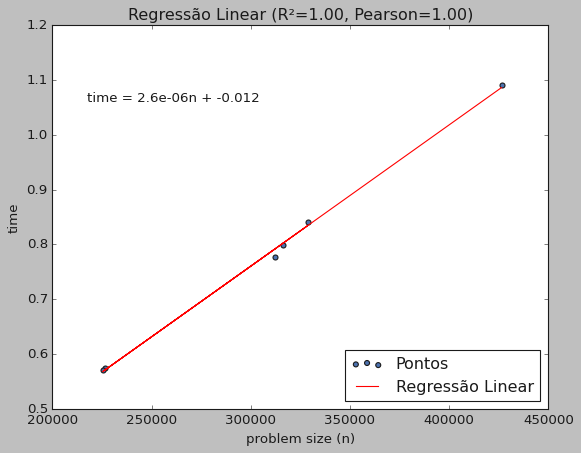

In [25]:
slopes = []

n = [image[0].n for image in lista_full]
t = [image[0].t for image in lista_full]
sl = show_linear_time(n,t)
slopes.append(sl)

## 3 CLUSTERS

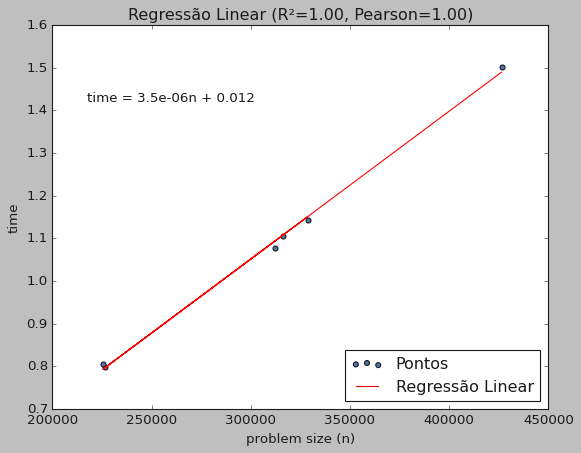

In [26]:
n = [image[1].n for image in lista_full]
t = [image[1].t for image in lista_full]
sl = show_linear_time(n,t)
slopes.append(sl)

## 4 CLUSTERS

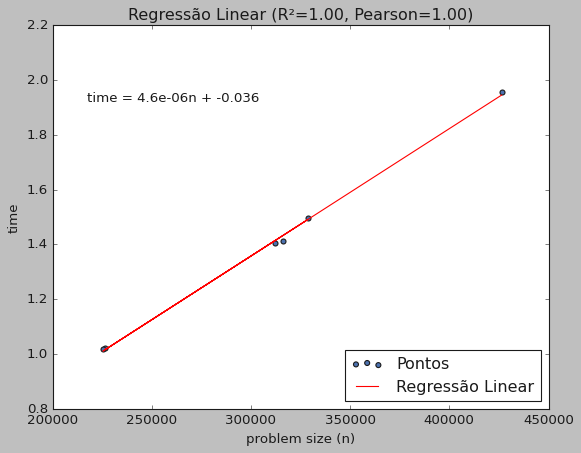

In [27]:
n = [image[2].n for image in lista_full]
t = [image[2].t for image in lista_full]
sl = show_linear_time(n,t)
slopes.append(sl)

# 8. Estudo Complexidade x K (como o tempo varia de acordo com o número de clusters - utilizando os slopes de cada cluster)

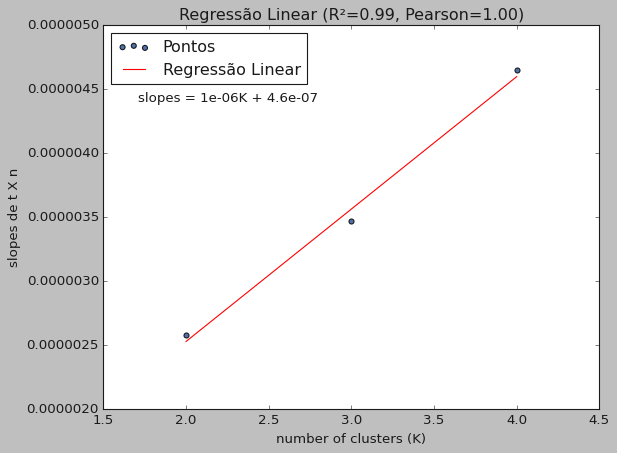

In [28]:
K = [2,3,4]
show_linear_K(K, slopes)

# Introdução

Neste estudo da matéria de Engenharia de Programas, analisamos a complexidade de um algoritmo de K-means em relação ao tempo de iteração, ao tamanho da imagem e a quantidade de clusters. O objetivo é entender como o tempo de execução do algoritmo cresce à medida que aumenta o tamanho das imagens processadas e aumentamos a quantidade de clusters. Para isso, utilizamos técnicas de regressão linear para modelar a relação entre essas variáveis e identificar a complexidade computacional do algoritmo. O k-means é um algoritmo de aprendizado de máquina não supervisionado usado para agrupar dados em k clusters distintos, o algoritmo se repete até todos os pixels (no caso estudado) não mudarem de cluster em relação a última iteração.

# Metodologia

Inicialmente, 6 imagens de tamanhos diferentes (variando de 225.432 a 426.400 pixels) foram escolhidas de uma pasta e transformadas em escala de cinza. Em sequência, as imagens foram transformadas em arrays unidimensionais para facilitar o estudo. Cada imagem foi submetida ao algoritmo de K-means para clusterização dos seus pixels em escala de cinza, foram 10 repetições para cada número de clusters, variando de k=2 a k=4. A inicialização dos clusters foi feita de forma não-randômica, onde o centroide era o ponto médio do cluster baseado no número de clusters e máximo e mínimo de intensidade de cinza. Após a execução de todas as repetições, um objeto que representava a clusterização da imagem para k clusters era instanciado guardando como atributos: tamanho da imagem, número de clusters, tempo médio de iteração, variabilidade e número de iterações. 

Após a execução de todos os números de cluster para uma imagem, um vetor contendo as execuções era guardado em outro vetor que guarda todas os dados de todas as imagens para estudo posterior. A função de K-means também retonava os valores dos centróides e a qual centróide cada pixel pertencia para a plotagem.

Finalmente, foram gerados gráficos para analisar a relação entre o tempo médio de iteração e o tamanho das imagens (t X n) para cada k clusters utilizando regressão linear, obtendo uma função capaz de estimar o tempo de execução de acordo com tamanho da imagem. Também foram gerados gráficos de regressão linear para analisar a relação do tempo com a quantidade de clusters, para isso foram utilizados os slopes das funções geradas na análise de 't X n' para cada K clusters.

# Resultados

Como a variabilidade em todas as imagens ficou menor que 0.15, o estudo possui confiabilidade. Após a análise dos gráficos, percebemos que o algoritmo de K-means tem complexidade O(Kn), já que a regressão linear de 't X n' para todos K clusters tem R^2 = 1.00, Pearson = 1.00 e função linear, representando que o tempo de execução é linearmente proporcional ao tamanho da imagem. Além disso, a complexidade é O(Kn) pois a regressão linear dos slopes por número de clusters tem R^2 = 0.99, Pearson = 1.00 e função linear, representando que o tempo de execução também é linearmente proporcional ao número de clusters. Podemos concluir que O(Kn) pois os slopes nas funções de 't X n' eram uma função de K, ou seja, 'time = f(K)n'.